# CNN 1D : Regression 


In [10]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Flatten
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers import Dropout

# Generate Data

In [2]:
def generate_data(num_samples=1000, sequence_length=20):
    # Generate random sequences
    X = np.random.rand(num_samples, sequence_length, 1)
    # Generate labels (sum of sequence elements)
    y = np.sum(X, axis=1)
    return X, y

In [3]:
X, y = generate_data()

# Split the Data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model

In [5]:
model = Sequential()

model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

model.add(Flatten())

model.add(Dense(1))

c:\Python\Python3125\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the model

In [6]:
model.compile(optimizer='adam', loss='mse')

# Build the model

In [7]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 97.2081 - val_loss: 74.2975
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 61.9705 - val_loss: 25.6624
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 15.4439 - val_loss: 0.3093
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6006 - val_loss: 0.5173
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.3074 - val_loss: 0.3723
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2756 - val_loss: 0.2989
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2162 - val_loss: 0.2978
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2205 - val_loss: 0.2924
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2065 - val_loss: 0.2910
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2099 - val_loss: 0.2838


# Evaluate the model

In [8]:
evaluation = model.evaluate(X_test, y_test)
print(f"Test Loss: {evaluation}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2232  
Test Loss: 0.23700080811977386


# Predict and Plot

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


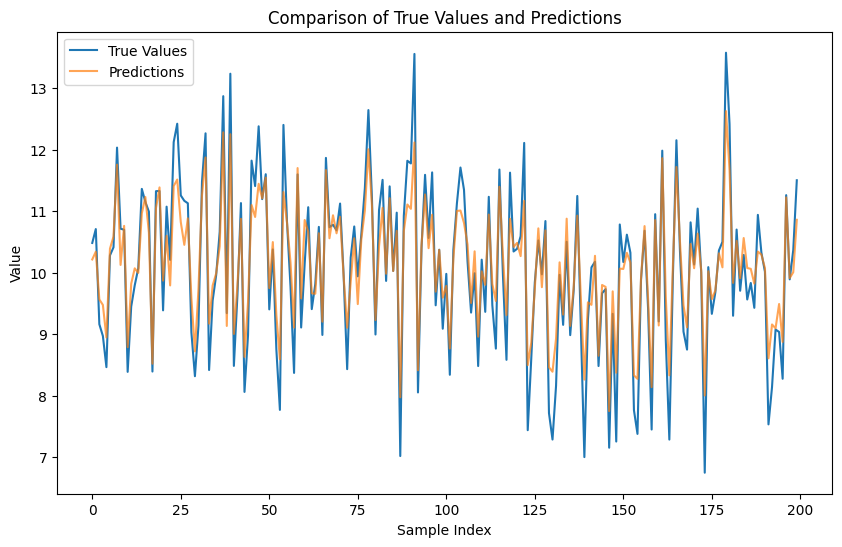

In [9]:
def predict(data):
    return model.predict(data)

# 5. Visualize predictions and truth
predictions = predict(X_test)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values')
plt.plot(predictions, label='Predictions', alpha=0.7)
plt.title('Comparison of True Values and Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# Improve the model Architecture

In [11]:
model = Sequential()

model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.2)),

model.add(Flatten()),

model.add(Dense(50, activation = "relu"))
model.add(Dense(1))

c:\Python\Python3125\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 18, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 16, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │        51,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,909 (249.64 KB)

 Trainable params: 63,909 (249.64 KB)

 Non-trainable params: 0 (0.00 B)

# Retrain the model

In [13]:
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size= 32)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 82.4434 - val_loss: 4.7219
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.3990 - val_loss: 1.5745
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.8554 - val_loss: 0.5938
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.4719 - val_loss: 0.3238
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.3427 - val_loss: 0.3163
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.3216 - val_loss: 0.3059
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3396 - val_loss: 0.3181
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3404 - val_loss: 0.3007
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2965 - val_loss: 0.2992
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3247 - val_loss: 0.2573
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2730 - val_loss: 0.2565
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.

# Re-Evaluate the model

In [14]:
evaluation = model.evaluate(X_test, y_test)
print(f"Test Loss: {evaluation}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0687  
Test Loss: 0.06502099335193634


# Predict and Plot

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


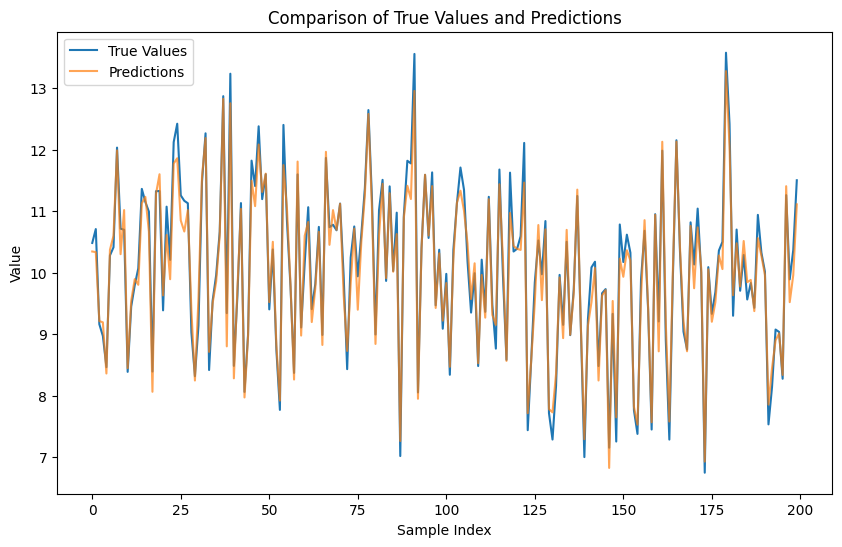

In [15]:
def predict(data):
    return model.predict(data)

# 5. Visualize predictions and truth
predictions = predict(X_test)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values')
plt.plot(predictions, label='Predictions', alpha=0.7)
plt.title('Comparison of True Values and Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()